# Homework 4

Mutluhan Üzmez
$150140133$

<text>In this homework we are asked to implement a single channel AM communication system Figure 1. in the homework paper</text>

## Single Channel AM Communication

### Voice record and select ROI
<text>First Step (a) Make an input signal by recording your voice for a one or two seconds. Use
a sampling rate of 44.1 kHz. The best test signal would have lots of vowels.
Plot the waveform using plot. Determine the beginning and end of significant
speech activity and select only that region for processing.
</text>

<text>First I recorded my voice. I tried to find a word that has a lot of vowels. The recorded word is "easier" Then I read the sound file.</text>

In [160]:
import wave
import IPython
import scipy.io.wavfile as wf
easier = wave.open('easier.wav', 'r')

<text>The wav file is already 44.1 kHz. File opened and plotted.</text>

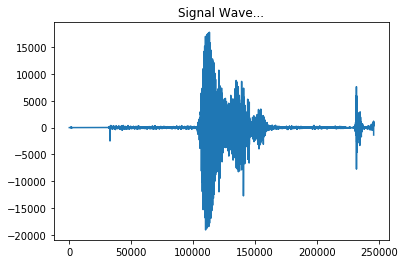

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import sys

mySignal = easier.readframes(-1)
mySignal = np.fromstring(mySignal, 'int16')


plt.figure(1)
plt.title('Signal Wave...')
plt.plot(mySignal)
plt.show()

In [162]:
listen = wf.write('test0.wav', 100000, mySignal)
IPython.display.Audio('test0.wav')

<text>Beginning and end of the speech activity determined by eye. Only the region of interest(speech activity in our signal) selected. </text>

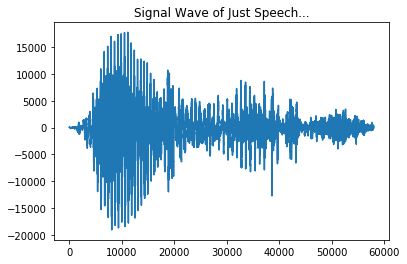

In [163]:
#write a function later which detects the speech autoamticaly
speech = mySignal[102000:160000]
plt.figure(1)
plt.title('Signal Wave of Just Speech...')
plt.plot(speech)
plt.show()

In [164]:
listen = wf.write('test1.wav', 100000, speech)
IPython.display.Audio('test1.wav')

### Filtering and Frequency Response
<text>Second Step (b) Filter the voice signal with the given FIR lowpass filter. Compute the frequency
response of the filter whose coefficients (You can use scipy.signal.freqz).
</text>

<text>FIR filter coefficents read from the file.</text>

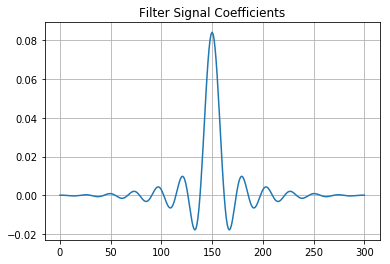

In [165]:
import scipy.io

mat = scipy.io.loadmat('firFilter_b_Coeffs.mat')
coefs = mat["b"]
filterSignal = coefs[0]
plt.figure(1)
plt.title('Filter Signal Coefficients')
plt.plot(filterSignal)
plt.grid(True, which='both')
plt.show()

<text>Computing the frequency response of the filter.</text>

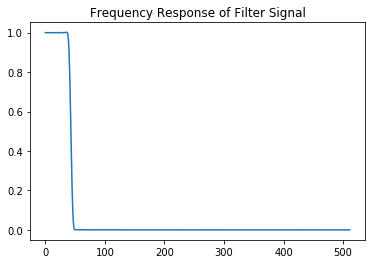

In [166]:
from scipy import signal

w, h = signal.freqz(filterSignal)
plt.figure(1)
plt.title('Frequency Response of Filter Signal')
plt.plot(abs(h))
plt.show()

<text>The original signal filtered with given FIR filter.</text>

In [97]:
from scipy.signal import lfilter

filteredSignal = lfilter(filterSignal, 1, speech)

In [136]:
listen = wf.write('test3.wav', 100000, filteredSignal)
IPython.display.Audio('test3.wav')

### Plotting the Filtered Signal and Frequency Response
<text>Third Step (c) Display the spectrogram of your filtered voice and estimate the bandwidth of
the speech signal.
</text>

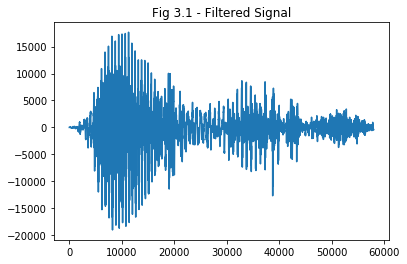

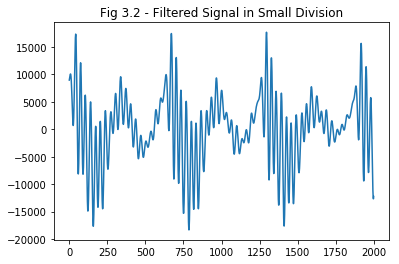

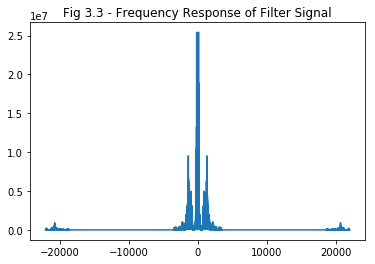

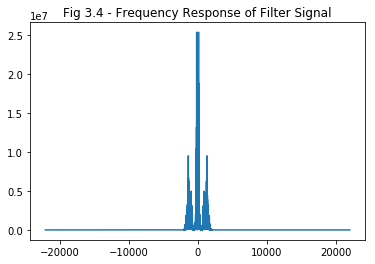

In [167]:
time_step = 1 / 44100
freqs = np.fft.fftfreq(filteredSignal.size, time_step)
idx = np.argsort(freqs)
plt.figure(0)
plt.title('Fig 3.1 - Filtered Signal')
plt.plot(filteredSignal)
plt.show()
plt.figure(1)
plt.title('Fig 3.2 - Filtered Signal in Small Division')
plt.plot(filteredSignal[10000:12000])
plt.show()
plt.figure(2)
plt.title('Fig 3.3 - Frequency Response of Filter Signal')
plt.plot(freqs[idx],abs(np.fft.fft(speech))[idx])
plt.show()
plt.figure(3)
plt.title('Fig 3.4 - Frequency Response of Filter Signal')
plt.plot(freqs[idx],abs(np.fft.fft(filteredSignal))[idx])
plt.show()

<text>The bandwidth of my speech signal seems between 0Hz and 2000Hz from the graph above.</text>

### AM Modulator
<text>Fourth Step (d) Make an AM signal by multiplying your voice by a cosine. Use a ”carrier
frequency” $fc = ωc/2π$ that is between 8 kHz and 9 kHz.</text>

<text>Lets define AM modulator function.</text>

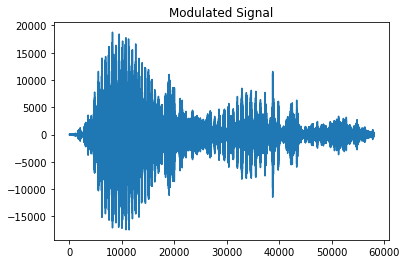

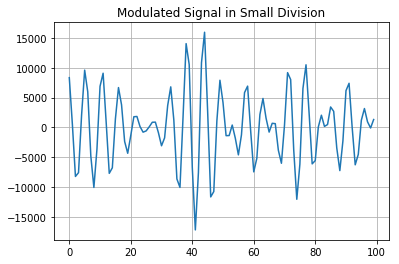

In [169]:
def ampModulation(signal, carrierFrequency):
    t = np.arange(signal.size)
    carrier = np.cos(2*np.pi*carrierFrequency*t/44100)
    mod = signal*carrier
    return mod
modulatedSignal = ampModulation(filteredSignal, 8000)
plt.figure(0)
plt.title('Modulated Signal')
plt.plot(modulatedSignal)
plt.show()
plt.figure(0)
plt.title('Modulated Signal in Small Division')
plt.plot(modulatedSignal[10000:10100])
plt.grid(True, which='both')
plt.show()

### AM Demodulator
<text>Fifth Step (e) Simulate the demodulator for the AM signal. Write the demodulator as a
function with input arguments for the frequency and phase. In other words,
implement a demodulator that can have a different carrier frequency $fc =ωc/(2π)$ and non-zero phase φ.
</text>

<text>Lets define a AM demodulator function</text>

In [170]:
def ampDemodulation(signal, carrierFrequency, phase):
    t = np.arange(signal.size)
    carrier = np.cos((2*np.pi*carrierFrequency*t/44100)+phase)
    demod = 2*carrier*signal
    demodulated = demod - ampModulation(signal, 2*carrierFrequency)
    return lfilter(filterSignal, 1, demodulated)

### Experiments with different phases
<text>Sixth Step (f)  First experiment with the effect of the phase difference. Set the demodulator
carrier frequency exactly equal to the modulator carrier frequency. You
can hear the effect of phase if you normalize your input signal $s(t)$ so that its
maximum magnitude is 1. Then you can listen to the various signals. Demonstrate
how the demodulator output depends on the phase. Show that for one
choice of the phase that you get zero output.
</text>

First I used the same carrier frequency and set the phase 0.

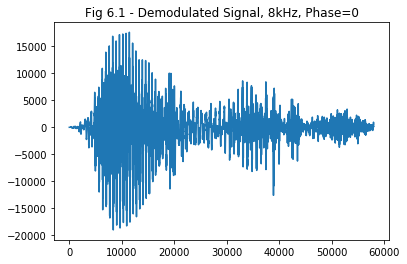

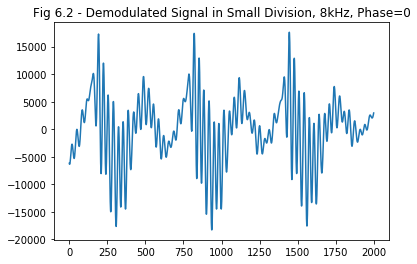

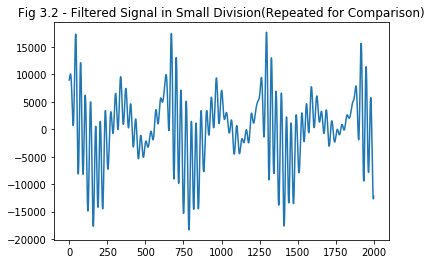

In [171]:
demodulatedSignal = ampDemodulation(modulatedSignal, 8000, 0)
plt.figure(0)
plt.title('Fig 6.1 - Demodulated Signal, 8kHz, Phase=0')
plt.plot(demodulatedSignal)
plt.show()
plt.figure(1)
plt.title('Fig 6.2 - Demodulated Signal in Small Division, 8kHz, Phase=0')
plt.plot(demodulatedSignal[10000:12000])
plt.show()

plt.figure(2)
plt.title('Fig 3.2 - Filtered Signal in Small Division(Repeated for Comparison)')
plt.plot(filteredSignal[10000:12000])
plt.show()


Fig 6.2 and Fig 3.2 looks like totaly same but there is shifting little bit. If I could listen that demodulated voice probably I would hear the same voice in the record.

In [147]:
listen = wf.write('test2.wav', 100000, demodulatedSignal)
IPython.display.Audio('test2.wav')

Then I used the same carrier frequency and set the phase 20. (Small Phase Shift)

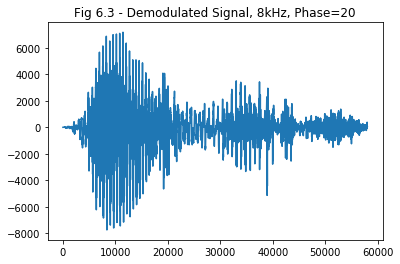

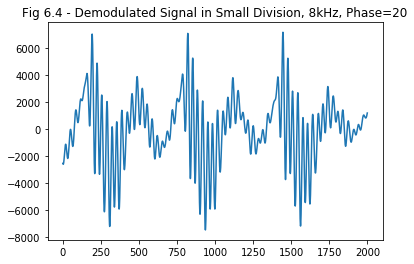

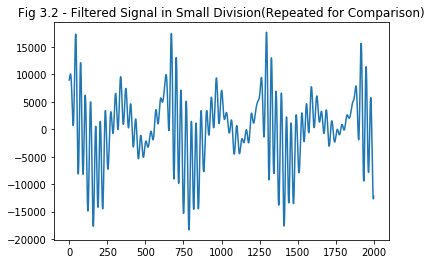

In [172]:
demodulatedSignal = ampDemodulation(modulatedSignal, 8000, 20)
plt.figure(0)
plt.title('Fig 6.3 - Demodulated Signal, 8kHz, Phase=20')
plt.plot(demodulatedSignal)
plt.show()
plt.figure(1)
plt.title('Fig 6.4 - Demodulated Signal in Small Division, 8kHz, Phase=20')
plt.plot(demodulatedSignal[10000:12000])
plt.show()

plt.figure(2)
plt.title('Fig 3.2 - Filtered Signal in Small Division(Repeated for Comparison)')
plt.plot(filteredSignal[10000:12000])
plt.show()


Fig 6.4 and Fig 3.2 looks like same again but the shifting increased little bit. If I could listen that demodulated voice probably I believe I would hear the same voice in the record but maybe with little bit delayed.

In [173]:
listen = wf.write('test3.wav', 100000, demodulatedSignal)
IPython.display.Audio('test3.wav')

After then I used the same carrier frequency and set the phase 500. (Large Phase Shift)

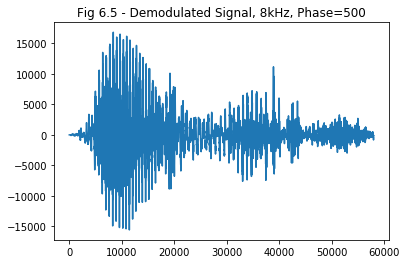

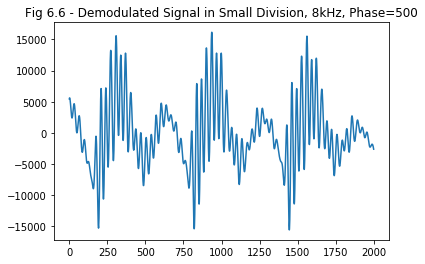

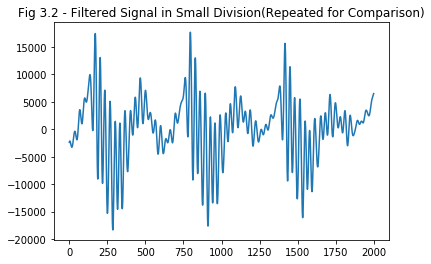

In [159]:
demodulatedSignal = ampDemodulation(modulatedSignal, 8000, 500)
plt.figure(0)
plt.title('Fig 6.5 - Demodulated Signal, 8kHz, Phase=500')
plt.plot(demodulatedSignal)
plt.show()
plt.figure(1)
plt.title('Fig 6.6 - Demodulated Signal in Small Division, 8kHz, Phase=500')
plt.plot(demodulatedSignal[10000:12000])
plt.show()

plt.figure(2)
plt.title('Fig 3.2 - Filtered Signal in Small Division(Repeated for Comparison)')
plt.plot(filteredSignal[10000:12000])
plt.show()


Fig 6.6 and Fig 3.2 looks like different in the same division. If I could listen that demodulated voice probably I would hear the same voice but too much delayed than the original one.

In [146]:
listen = wf.write('test4.wav', 100000, demodulatedSignal)
IPython.display.Audio('test4.wav')

### Demodulation with different frequency carrier
<text>Seventh Step (g) Next set the phase to zero and make the demodulator carrier frequency 10
Hz higher than the carrier frequency of the modulator. Listen to the demodulated
signal. How do you characterize the output?
</text>

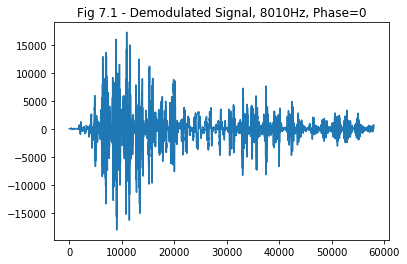

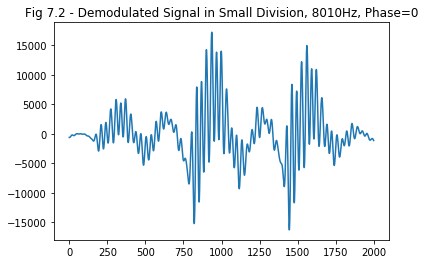

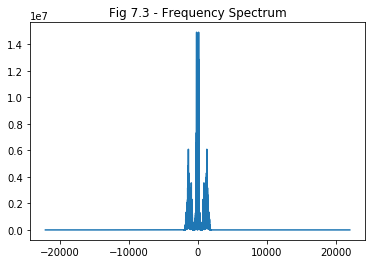

In [151]:
demodulatedSignal = ampDemodulation(modulatedSignal, 8010, 0)
plt.figure(0)
plt.title('Fig 7.1 - Demodulated Signal, 8010Hz, Phase=0')
plt.plot(demodulatedSignal)
plt.show()
plt.figure(1)
plt.title('Fig 7.2 - Demodulated Signal in Small Division, 8010Hz, Phase=0')
plt.plot(demodulatedSignal[10000:12000])
plt.show()

time_step = 1 / 44100
freqs = np.fft.fftfreq(filteredSignal.size, time_step)
idx = np.argsort(freqs)
plt.figure(2)
plt.title('Fig 7.3 - Frequency Spectrum')
plt.plot(freqs[idx], abs(np.fft.fft(demodulatedSignal))[idx])
plt.show()

Changing frequency 10 Hz completely change the output. Totally different signal obtained. If Fig 7.1 and Fig 3.2 compared, it seems like Fig 7.1 little bit shifted to the right.

In [139]:
listen = wf.write('test4.wav', 100000, demodulatedSignal)
IPython.display.Audio('test4.wav')

## Conclusion

All steps are succesfully implemented on phyton. The differences between the original and demodulated signal can be seen easily from the graphs. I could not listen the demodulated voices and I could not test the diffence on voice with my ears but looking the graphs I made some explanations under them. This homework improved my python skills and my experince on jupyter notebook. Also i improved my signal processing skills with phyton.
